# Before augmentation of the dataset

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

training_dataset = image_dataset_from_directory(
  "dataset/train/",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

validation_dataset = image_dataset_from_directory(
  "dataset/train/",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32)


Found 399 files belonging to 3 classes.
Using 320 files for training.
Found 399 files belonging to 3 classes.
Using 79 files for validation.


In [6]:
class_names = training_dataset.class_names
print(class_names)

['AFRICAN CROWNED CRANE', 'AFRICAN FIREFINCH', 'ALBATROSS']


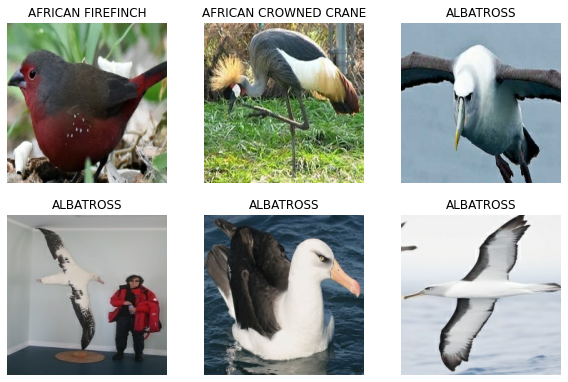

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) # Maximum size of the image that is showed in ipynb.
for images, labels in training_dataset.take(1): # Acessing images in the first take.
    for i in range(6):
        ax = plt.subplot(3,3, i + 1) # Max rows. Max columns. Index aka first index is upper left corner position.
        plt.imshow(images[i].numpy().astype("uint8")) # Showing the image i.
        plt.title(class_names[labels[i]])  # Assing title to image i.
        plt.axis("off") # Removing x and y description/numbers.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(128, (1, 1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(275, activation='softmax')
])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 256)      

In [9]:
model.compile(optimizer="adam", loss= tf.keras.losses.SparseCategoricalCrossentropy() , metrics=["accuracy"])

model.fit(
    training_dataset,
    validation_data=validation_dataset,
    epochs=4
)

Epoch 1/4
10/10 [==============================] - 8s 161ms/step - loss: 2.9579 - accuracy: 0.6156 - val_loss: 21.2173 - val_accuracy: 0.6456
Epoch 2/4
10/10 [==============================] - 1s 54ms/step - loss: 1.3476 - accuracy: 0.8500 - val_loss: 15.8469 - val_accuracy: 0.6582

## Summary
Becuase of so little data the los function is having a hard time. And, because there are so little data to train on the
accuracy doesn`t improve much

